In [ ]:
from configs.featuresShiftedConfig import FeaturesShiftedConfig
# pip install -U "vectorbtpro[base] @ git+https://github.com/polakowo/vectorbt.pro.git"

import vectorbtpro as vbt
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from common.featuresTargetsUnshiftedMaker import FeaturesTargetsUnshiftedMaker
from configs.config import Config
from vectorbtpro.data.custom import LocalDataT

%load_ext autoreload
%autoreload 2

flipConfig =FeaturesShiftedConfig(Config.flippedDir)
flipConfig.createFeaturesShiftedPath()

In [8]:
### This is for explore only. It was replaced by creating flipped data in services.

barData: LocalDataT = vbt.HDFData.fetch(Config.relativeDownloadDataPath)


  0%|          | 0/2 [00:00<?, ?it/s]

In [9]:
btcBarFeatures = barData.data['X:BTCUSD']
type(btcBarFeatures.Close)

pandas.core.series.Series

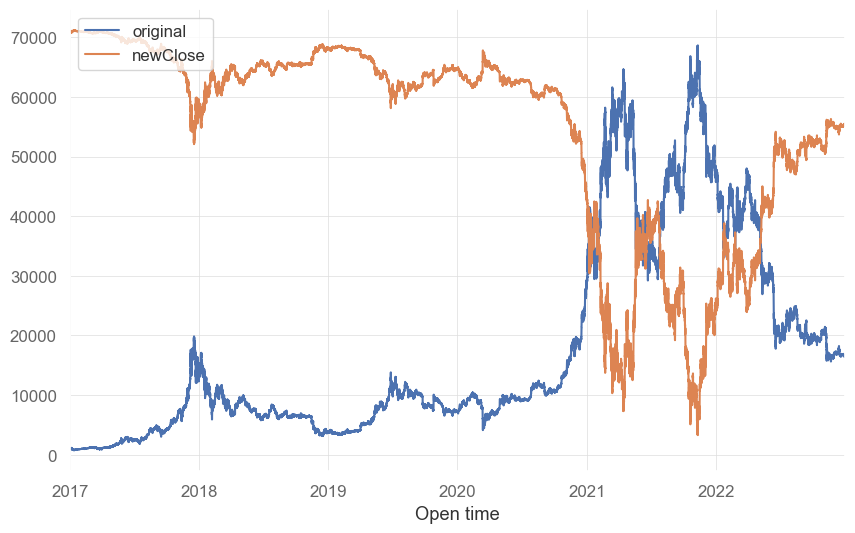

In [10]:
from pandas import Series


def flipSeries(originalSeries: Series):
    a = DataFrame()
    a['originalSeries'] = originalSeries
    a['diff'] = btcBarFeatures.Close.diff()
    a['negdiff'] = a['diff'] * -1
    start = a['originalSeries'].iloc[0]
    a['newSeries']=0
    a.loc[a.index[0], 'newSeries'] = start
    for i in range(1, len(a)):
        a.loc[a.index[i], 'newSeries'] = a.loc[a.index[i-1], 'newSeries'] + a.loc[a.index[i], 'negdiff']
    a['newSeries'] = a['newSeries']+70000
    return a['newSeries']

newClose: Series = flipSeries(btcBarFeatures.Close)
newOpen: Series = flipSeries(btcBarFeatures.Open)
newHigh: Series = flipSeries(btcBarFeatures.High)
newLow: Series = flipSeries(btcBarFeatures.Low)

btcBarFeatures.Close.plot(label="original")
newClose.plot(label="newClose")
plt.legend(loc="upper left")


<Axes: xlabel='Open time'>

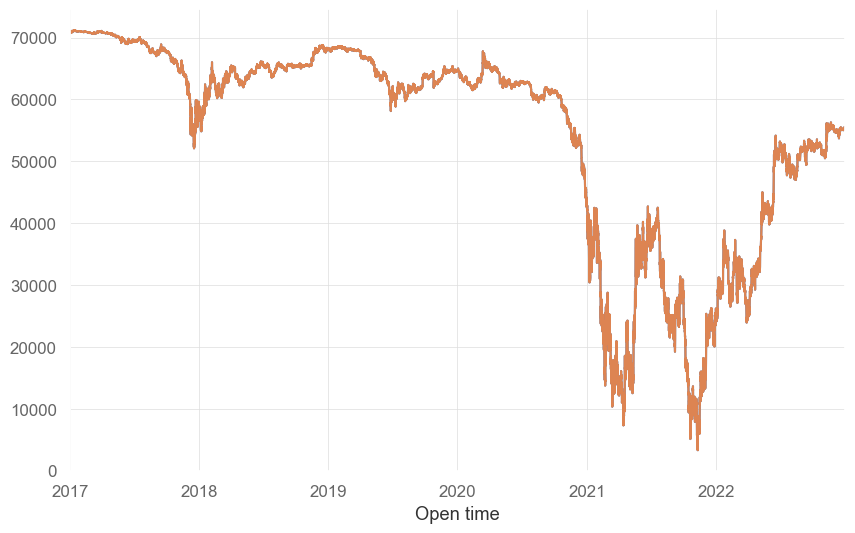

In [11]:
barData.data['X:BTCUSD']['Close'] = newClose
barData.data['X:BTCUSD']['Open'] = newOpen
barData.data['X:BTCUSD']['High'] = newHigh
barData.data['X:BTCUSD']['Low'] = newLow

barData.data['X:BTCUSD']['Close'].plot()
barData.data['X:BTCUSD']['Open'].plot()


In [12]:



featuresTargetsMaker: FeaturesTargetsUnshiftedMaker = FeaturesTargetsUnshiftedMaker()

featuresTargetsUnshifted: DataFrame = featuresTargetsMaker.loadData(barData, 'X:BTCUSD')
featuresTargetsUnshifted

file:1: RuntimeWarning: divide by zero encountered in divide
file:1: RuntimeWarning: divide by zero encountered in divide
file:1: RuntimeWarning: divide by zero encountered in divide


,Open,High,Low,Close,Volume,Trade count,VWAP,ad_real,add_real,adosc_real,adx_real,adxr_real,apo_real,aroon_aroondown,aroon_aroonup,aroonosc_real,atan_real,atr_atr,atr_tr,avgprice_real,bbands_bandwidth,bbands_lower,bbands_middle,bbands_percent_b,bbands_upper,beta_real,bop_real,cci_real,cdl2crows_integer,cdl3blackcrows_integer,cdl3inside_integer,cdl3linestrike_integer,cdl3outside_integer,cdl3starsinsouth_integer,cdl3whitesoldiers_integer,cdlabandonedbaby_integer,cdladvanceblock_integer,cdlbelthold_integer,cdlbreakaway_integer,cdlclosingmarubozu_integer,cdlconcealbabyswall_integer,cdlcounterattack_integer,cdldarkcloudcover_integer,cdldoji_integer,cdldojistar_integer,cdldragonflydoji_integer,cdlengulfing_integer,cdleveningdojistar_integer,cdleveningstar_integer,cdlgapsidesidewhite_integer,cdlgravestonedoji_integer,cdlhammer_integer,cdlhangingman_integer,cdlharami_integer,cdlharamicross_integer,cdlhighwave_integer,cdlhikkake_integer,cdlhikkakemod_integer,cdlhomingpigeon_integer,cdlidentical3crows_integer,cdlinneck_integer,cdlinvertedhammer_integer,cdlkicking_integer,cdlkickingbylength_integer,cdlladderbottom_integer,cdllongleggeddoji_integer,cdllongline_integer,cdlmarubozu_integer,cdlmatchinglow_integer,cdlmathold_integer,cdlmorningdojistar_integer,cdlmorningstar_integer,cdlonneck_integer,cdlpiercing_integer,cdlrickshawman_integer,cdlrisefall3methods_integer,cdlseparatinglines_integer,cdlshootingstar_integer,cdlshortline_integer,cdlspinningtop_integer,cdlstalledpattern_integer,cdlsticksandwich_integer,cdltakuri_integer,cdltasukigap_integer,cdlthrusting_integer,cdltristar_integer,cdlunique3river_integer,cdlupsidegap2crows_integer,cdlxsidegap3methods_integer,ceil_real,cmo_real,correl_real,cos_real,dema_real,div_real,dx_real,ema_real,floor_real,ht_dcperiod_real,ht_dcphase_real,ht_phasor_inphase,ht_phasor_quadrature,ht_sine_leadsine,ht_sine_sine,ht_trendline_real,ht_trendmode_integer,kama_real,linearreg_real,linearreg_angle_real,linearreg_intercept_real,linearreg_slope_real,ln_real,log10_real,ma_ma,macd_hist,macd_macd,macd_signal,macdext_macd,macdext_macdhist,macdext_macdsignal,macdfix_macd,macdfix_macdhist,macdfix_macdsignal,mama_fama,mama_mama,mavp_real,max_real,maxindex_integer,medprice_real,mfi_real,midpoint_real,midprice_real,min_real,minindex_integer,minmax_max,minmax_min,minmaxindex_maxidx,minmaxindex_minidx,minus_di_real,minus_dm_real,mom_real,mult_real,natr_real,obv_obv,plus_di_real,plus_dm_real,ppo_real,roc_real,rocp_real,rocr_real,rocr100_real,rsi_rsi,sar_real,sarext_real,sin_real,sma_real,sqrt_real,stddev_real,stoch_fast_k,stoch_slow_d,stoch_slow_k,stochf_fastd,stochf_fastk,stochrsi_fastd,stochrsi_fastk,sub_real,sum_real,t3_real,tan_real,tanh_real,tema_real,trange_real,trima_real,trix_real,tsf_real,typprice_real,ultosc_real,var_real,wclprice_real,willr_real,wma_real,outWQA1,outWQA2,outWQA4,outWQA5,outWQA6,outWQA7,outWQA8,outWQA9,outWQA10,outWQA11,outWQA12,outWQA13,outWQA14,outWQA16,outWQA17,outWQA18,outWQA19,outWQA20,outWQA21,outWQA22,outWQA23,outWQA24,outWQA25,outWQA26,outWQA27,outWQA28,outWQA29,outWQA30,outWQA31,outWQA32,outWQA33,outWQA34,outWQA35,outWQA36,outWQA37,outWQA38,outWQA39,outWQA40,outWQA41,outWQA42,outWQA43,outWQA44,outWQA45,outWQA46,outWQA47,outWQA49,outWQA51,outWQA52,outWQA53,outWQA54,outWQA55,outWQA56,outWQA57,outWQA60,outWQA61,outWQA62,outWQA64,outWQA65,outWQA66,outWQA68,outWQA71,outWQA72,outWQA73,outWQA74,outWQA75,outWQA77,outWQA78,outWQA81,outWQA83,outWQA85,outWQA86,outWQA88,outWQA94,outWQA95,outWQA98,outWQA99,outWQA101,longEntry10,shortEntry10,longEntry20,shortEntry20,longEntry50,shortEntry50,longEntry100,shortEntry100
Open time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00+00:00,70973.370,70973.400,70962.040,70967.000,401.218604,675,968.7170,-5.085870e+01,141935.440,N

In [ ]:
pd.set_option('display.max_columns', None)

from services.featureDataShiftedCheckpointHandler import FeatureDataShiftedHandler
checkpointHandler: FeatureDataShiftedHandler = FeatureDataShiftedHandler(featuresTargetsUnshifted)
featureDataShifted: DataFrame = checkpointHandler.fetchOrCreateSave(
        flipConfig.featuresShiftedPath, flipConfig.featuresShiftedKey)
print("PATH   " + flipConfig.featuresShiftedPath)
featureDataShifted.shape

In [17]:
for column in featuresTargetsUnshifted.columns:
    if column not in featureDataShifted.columns:
        print(column)




In [18]:
for column in featureDataShifted.columns:
    if column not in featuresTargetsUnshifted.columns:
        print(column)

CurrentOpen


In [25]:
barData: LocalDataT = vbt.HDFData.fetch(Config.relativeDownloadDataPath)
#taData: DataFrame = barData.run("talib", periods=vbt.run_func_dict(mavp=14))

barData.data['X:BTCUSD'].vbt.run("talib", periods=vbt.run_func_dict(mavp=14))

  0%|          | 0/2 [00:00<?, ?it/s]

AttributeError: 'Vbt_DFAccessor' object has no attribute 'run'